In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

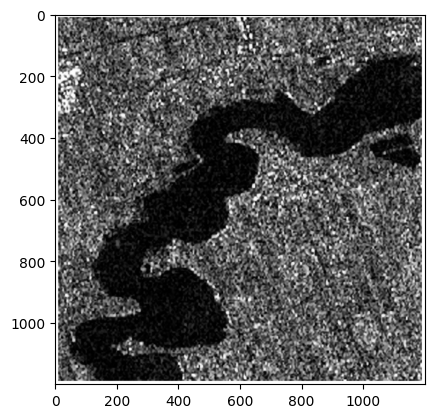

In [4]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [5]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

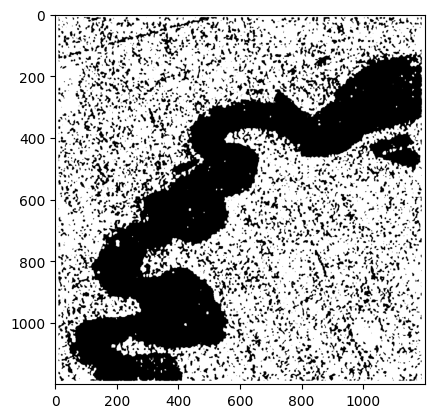

In [6]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [7]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

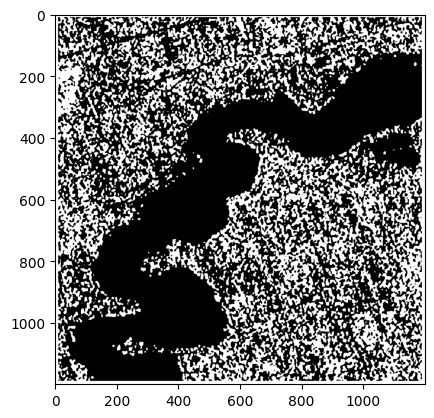

In [8]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [9]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


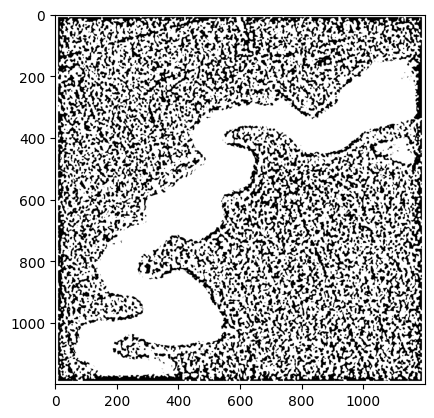

In [10]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [11]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

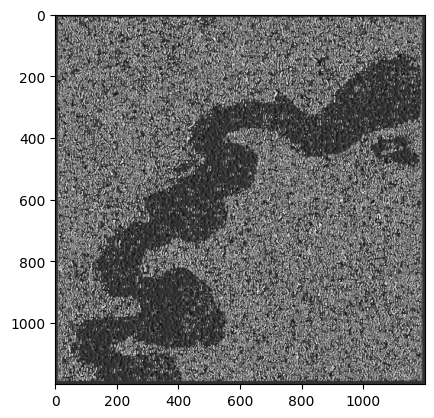

In [12]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

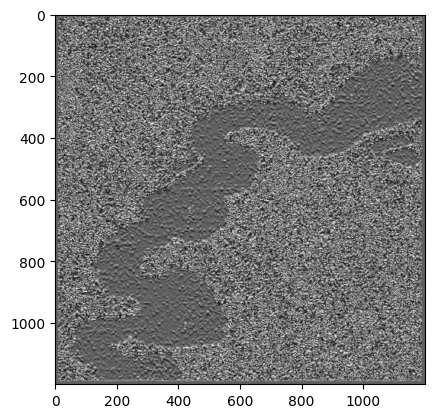

In [13]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [14]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

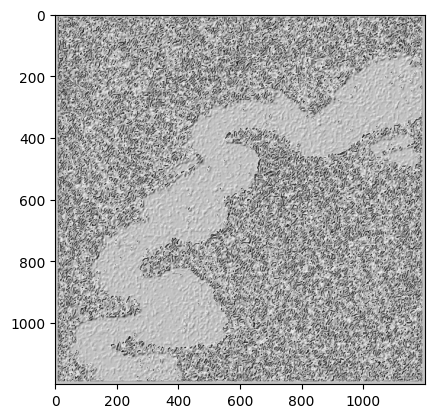

In [15]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [16]:
edges = cv2.Canny(image_gray,100,200)

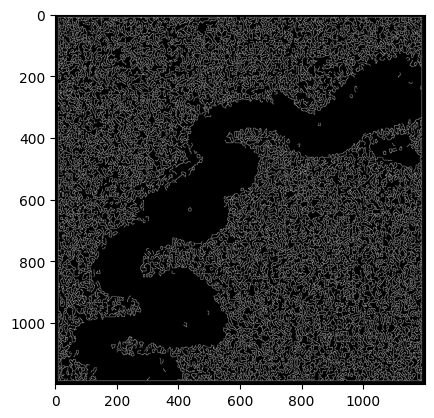

In [17]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [18]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

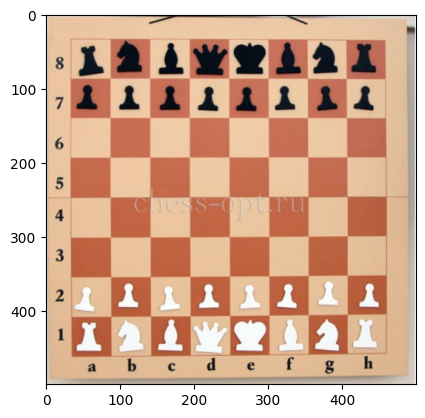

In [19]:
plt.imshow(image)

In [20]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [21]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [22]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

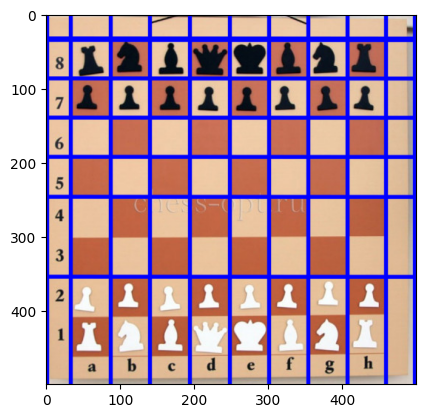

In [23]:
plt.imshow(image)

In [24]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [25]:
image = cv2.imread('sar_3.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 

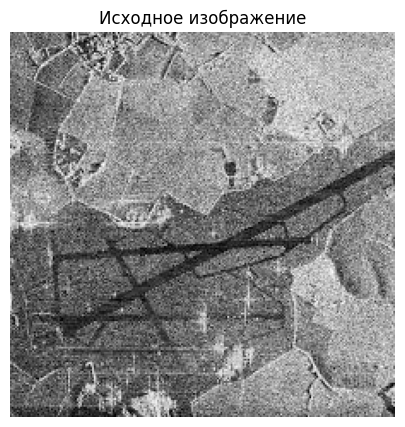

In [26]:
plt.figure(figsize=(15, 5))
plt.imshow(image)
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

In [27]:
denoised = cv2.medianBlur(image_gray, 5)

equalized = cv2.equalizeHist(denoised)

blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

In [28]:
canny = cv2.Canny(blurred, 30, 100, apertureSize=3)

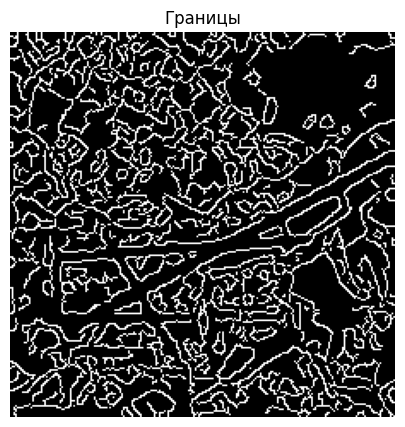

In [29]:
plt.figure(figsize=(15, 5))
plt.imshow(canny, cmap='gray')
plt.title('Границы')
plt.axis('off')
plt.show()

In [42]:
lines = cv2.HoughLines(canny, 1, np.pi / 70, 90)

In [43]:
image_with_lines = image.copy()

In [44]:
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)  
        b = math.sin(theta)  
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a))) 
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))  
        cv2.line(image_with_lines, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)

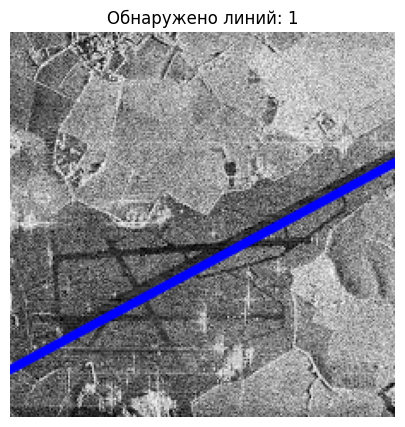

In [45]:
plt.figure(figsize=(15, 5))
plt.imshow(image_with_lines)
plt.title(f'Обнаружено линий: {len(lines) }')
plt.axis('off')
plt.show()

In [46]:
_, otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

adaptive_mean = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 35, 10)



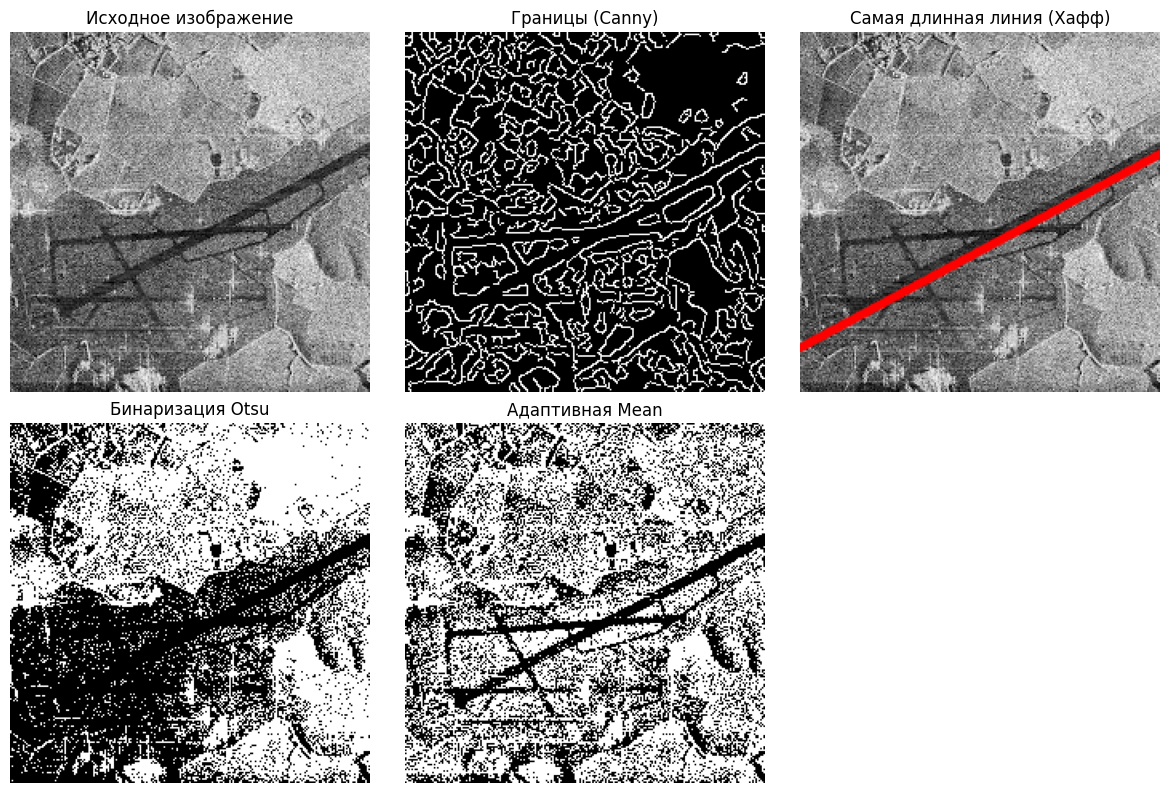

In [47]:
plt.figure(figsize=(12, 8))

plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Исходное изображение"), plt.axis("off")

plt.subplot(232), plt.imshow(canny, cmap="gray")
plt.title("Границы (Canny)"), plt.axis("off")

plt.subplot(233), plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title("Самая длинная линия (Хафф)"), plt.axis("off")

plt.subplot(234), plt.imshow(otsu, cmap="gray")
plt.title("Бинаризация Otsu"), plt.axis("off")

plt.subplot(235), plt.imshow(adaptive_mean, cmap="gray")
plt.title("Адаптивная Mean"), plt.axis("off")

plt.tight_layout()
plt.show()